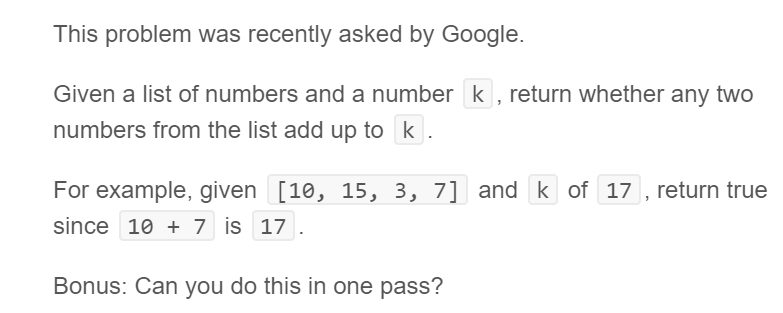

### Approach 1 -- for each element ,find other element in array whose sum is equal to k

In [ ]:
def FindNumber(arr,k):
    n = len(arr)
    for i in range(0,n-1):
        for j in range(i+1,n):
            if arr[i] + arr[j] == k:
                print(arr[i], arr[j])
                return True
    return False
            
arr = [10,15,3,8]
k = 17
status = FindNumber(arr,k)
print(status)

### Approach 2 -- find y = k-x in array using binary search 
1. sort the array
2. find sum of middle 2 numbers --- x + y = k
3. for each element x in array: find y = k - x 
4. binary search for y in the array

In [10]:
def FindNumberBinarySort(arr,k):
    n = len(arr)    
    arr.sort()
    left, right = 0, n-1
    status = False
    for x in arr:
        # y = k - x
        y = k - x       
        # avoid 2 numbers being the same
        if y!=x:
            status = BinarySearch(arr,y,left, right)         
            if status:
                print(x,y)
                break
            status = False
    return status

  

def BinarySearch(arr,k,left, right):
    #print(arr)
    if right>=left:    
        # find middle element index
        m = left + (right-left)//2
        if arr[m] == k:
            return True
            #return m  -- return index in sorted array
        elif arr[m] > k:
            return BinarySearch(arr,k,left,m-1)
        else:
            return BinarySearch(arr,k,m+1,right)
    
    
arr = [10,15,3,8]
k = 17
left,right = 0, len(arr)-1
status = FindNumberBinarySort(arr,k)
print(status)

False


### Product of array elements except itself

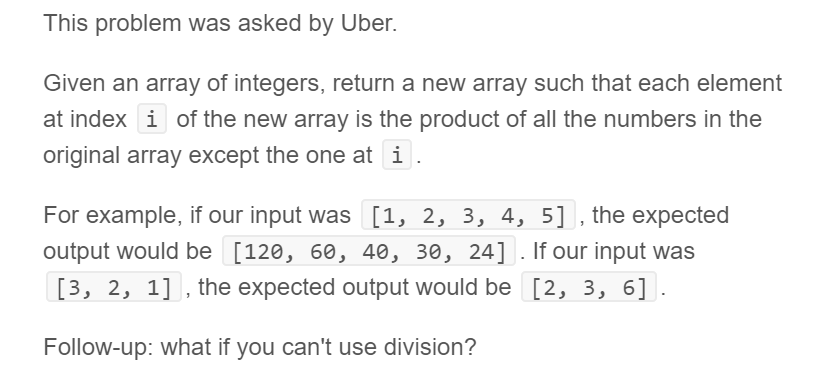

### Approach 1 - simple - time - O(n), space - O(1)
1. find product of all numbers - prod
2. for each element - divide prod with that index element

### Approach 2 - with out division using logarithmic approach- time - O(n),  space - O(1)
1. find log of each element and add them -- product of numbers =  logarithmic sum of numbers, sum-- loga + logb + logc
2. for each element - find antilog of (above sum - log of that index element)
3. ex: for a -- antilog(sum - loga)
    
### Approach 3 -  with out division using temp left and right - time - O(n) , space - O(n)- can be optimized to O(1) space
1. find left and right products of index i -- store in left and right temp arrays at index i
2. for each element index at index i -  product = left[i] * right[i]

In [39]:
# using division

def ProductArrayDiv(arr):
    n = len(arr)
    prod = 1
    for a in arr:
        prod *= a
    res = []
    for a in arr:
        res.append(int(prod/a))
    print(res)

# logarithmic approach
import math
def ProductArray(arr):
    EPS = 1e-9 # to maintain precision
    n = len(arr)
    # find log sum of all elements -- product of numbers
    # use log base - 10
    s = 0
    for a in arr:
        s += math.log10(a)
    #print('sum= ', s)
    
    # find antilog of (s - logarr[i] at index i)
    prod = []
    for a in arr:
        prod.append(int(EPS + pow(10.0, (s-math.log10(a)))))
    print(prod)

    
arr = [5,2,3,4,6]
ProductArrayDiv(arr)
ProductArray(arr)

[144, 360, 240, 180, 120]
[144, 360, 240, 180, 120]


### Serializing and Deserializing a binary tree
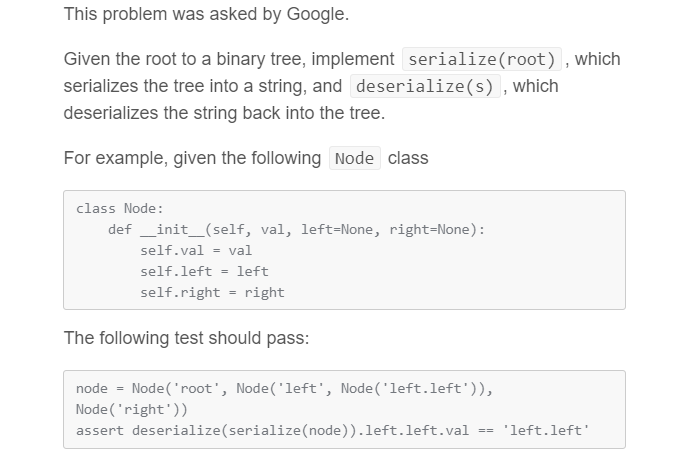

https://www.geeksforgeeks.org/serialize-deserialize-binary-tree/   -- general     
https://medium.com/@dimko1/serialize-and-deserialize-binary-tree-e9811ead85ed  -- python   
https://www.youtube.com/watch?v=jwzo6IsMAFQ --- index should be global  

### Approach
1. Serializing is to store in a file and restore later by Deserializing
2. Store pre order traversal of tree as array of strings -- (add -1 to null node)
3. Read characters from array, construct nodes from it

In [220]:
class SerializeDeSerializeBT:
    def __init__(self):
        self.encodedString = []
        self.index = 0
        self.decodedTree = None
    
    # convert binary tree as string
    def Serialize(self, root):
        self.encodedString = []
        #encoding
        self.Encode(root)
        return self.encodedString
    
    # recursively add nodes to encoded string
    def Encode(self,root):
        if root is not None:
            self.encodedString.append(root.val)
            self.Encode(root.left)
            self.Encode(root.right)
        # add None for Null pointers -- where left or right is empty,including None for left and right most childs
        else:
            self.encodedString.append(None)

    def DeSerialize(self, encodedString):
        self.index = 0
        self.decodedTree = self.Decode(encodedString)
        return self.decodedTree
        
    def Decode(self, encodedString):
        if encodedString[self.index] is None:
            #print(self.index)
            self.index += 1
            return None
        #print(self.index)
        root = Node(encodedString[self.index])
        self.index += 1
        root.left = self.Decode(encodedString)
        #print('right')
        root.right = self.Decode(encodedString)
        return root   

    def InorderTraversal(self, node):
        if node:
            self.InorderTraversal(node.left)
            print(node.val,end=' ')
            self.InorderTraversal(node.right)
    
    def PrintEncode(self):
        print(self.encodedString)
        

In [221]:
# test code
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [222]:
# print serialized output
sd = SerializeDeSerializeBT()
encodedString = sd.Serialize(node)
print(encodedString)

['root', 'left', 'left.left', None, None, None, 'right', None, None]


In [223]:
# deserializing the encoded string and printing inorder traversal
root = sd.DeSerialize(encodedString)
# print inorder
sd.InorderTraversal(root)

left.left left root right 

### Testing the code with sample input

In [224]:
# create a binary tree with root,left, right and left.left nodes
node = Node('root', Node('left', Node('left.left')), Node('right'))
sd = SerializeDeSerializeBT()
tree = sd.DeSerialize(sd.Serialize(node))
assert sd.DeSerialize(sd.Serialize(node)).left.left.val == 'left.left'
assert sd.DeSerialize(sd.Serialize(node)).right.val == 'right'
print('serialized and deserialized a binary tree')

serialized and deserialized a binary tree


### First missing positive integer

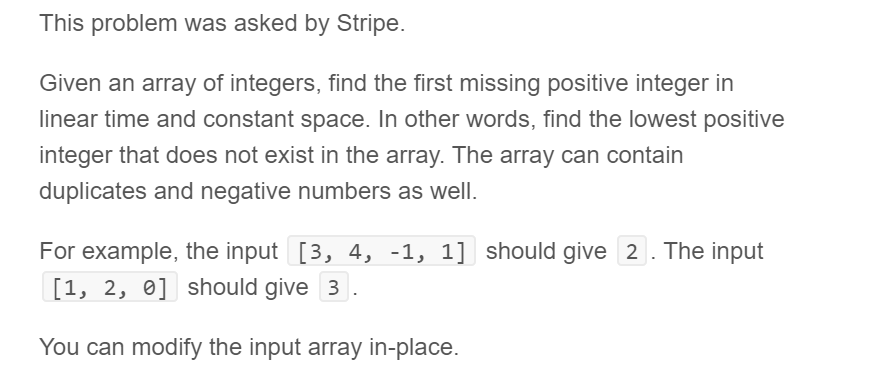

### Approach 1: works only when there are no duplicates -- can include negative integers too
1. find count of positive numbers -- n 
2. using this find sum of n+1 positive integers -- (n+1) * (n+2)/2
3. find missing element
4. missing = sum of n+1 positive integers - sum(all n positive integers in array)


In [28]:
def MissingElement(arr):
    n = 0
    s = 0
    for i in range(len(arr)):
        if arr[i]>0:
            s += arr[i]
            n += 1

    # find missing element
    # missing = sum of n+1 positive integers - sum(all n positive integers in array)
    n += 1
    sum_Calc = n * (n+1)/2
    missing = sum_Calc - s
    print('missing element:', int(missing))

arr = [3,5,4,-1,1]
MissingElement(arr)

missing element: 2


### Approach 2: Hashing -- works for positives, negatives, duplicates
1. find positive integers -- add to hash table -dictionary -- n positive integers
2. search dictionary from 1 to n+1 -- find missing element
3. time complexity - O(n) , space - O(n)

In [57]:
def MissingElement(arr):
    pos_Dict = {}
    
    # dictionary of postive integers    
    for i in range(len(arr)):
        if arr[i]>0:
            if arr[i] in pos_Dict.keys():
                pos_Dict[arr[i]] += 1                
            else:
                pos_Dict[arr[i]] = 1
    print(pos_Dict)
    # missing positive integer -- starting from 1 to n+1
    for i in range(1,len(pos_Dict)+2):
        #print(i)
        if i not in pos_Dict.keys():
            print('missing element:', i)
            return i
    
    
arr = [3,4,4,3,3,3,5,2,-1,1]
MissingElement(arr)

{3: 4, 4: 2, 5: 1, 2: 1, 1: 1}
missing element: 6


6

### Approach 3 - time complexity - O(n) , space complexity - O(1) -- index based sign change
https://www.geeksforgeeks.org/find-the-smallest-positive-number-missing-from-an-unsorted-array/